In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from akvmodel import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
NUM_AGENTS = 8
NUM_STEPS = 30

In [15]:
initial_configurations = [
    [InitialConfigurations.uniform(NUM_AGENTS), "Uniform"],
    [InitialConfigurations.mildly(NUM_AGENTS), "Mildly polarized"],
    [InitialConfigurations.extreme(NUM_AGENTS), "Extremely polarized"],
    [InitialConfigurations.tripolar(NUM_AGENTS), "Tripolar"],
]
influence_graphs = [
    [InfluenceGraphs.clique(NUM_AGENTS), "Clique"],
    [InfluenceGraphs.circular(NUM_AGENTS), "Circular"],
    [InfluenceGraphs.faintly(NUM_AGENTS), "Faintly connected"],
    [InfluenceGraphs.disconnected(NUM_AGENTS), "Disconnected"],
    [InfluenceGraphs.malleable_influencers(NUM_AGENTS), "Malleable influencers"],
    [InfluenceGraphs.unrelenting_influencers(NUM_AGENTS), "Unrelenting influencers"],
]

### Just classic belief update

In [16]:
models = []
for influence_graph in influence_graphs:
    line = []
    for initial_configuration in initial_configurations:
        model = AKV(
            initial_configuration[0],
            influence_graph[0],
            UpdateFunctions.classic,
        )
        for _ in range(NUM_STEPS):
            model.update()
        line = line + [model]
    models = models + [line]

In [17]:
polarization = []
for i in range(len(influence_graphs)):
    row = []
    for j in range(len(initial_configurations)):
        row += [models[i][j].get_polarization()[0]]
    polarization += [row]

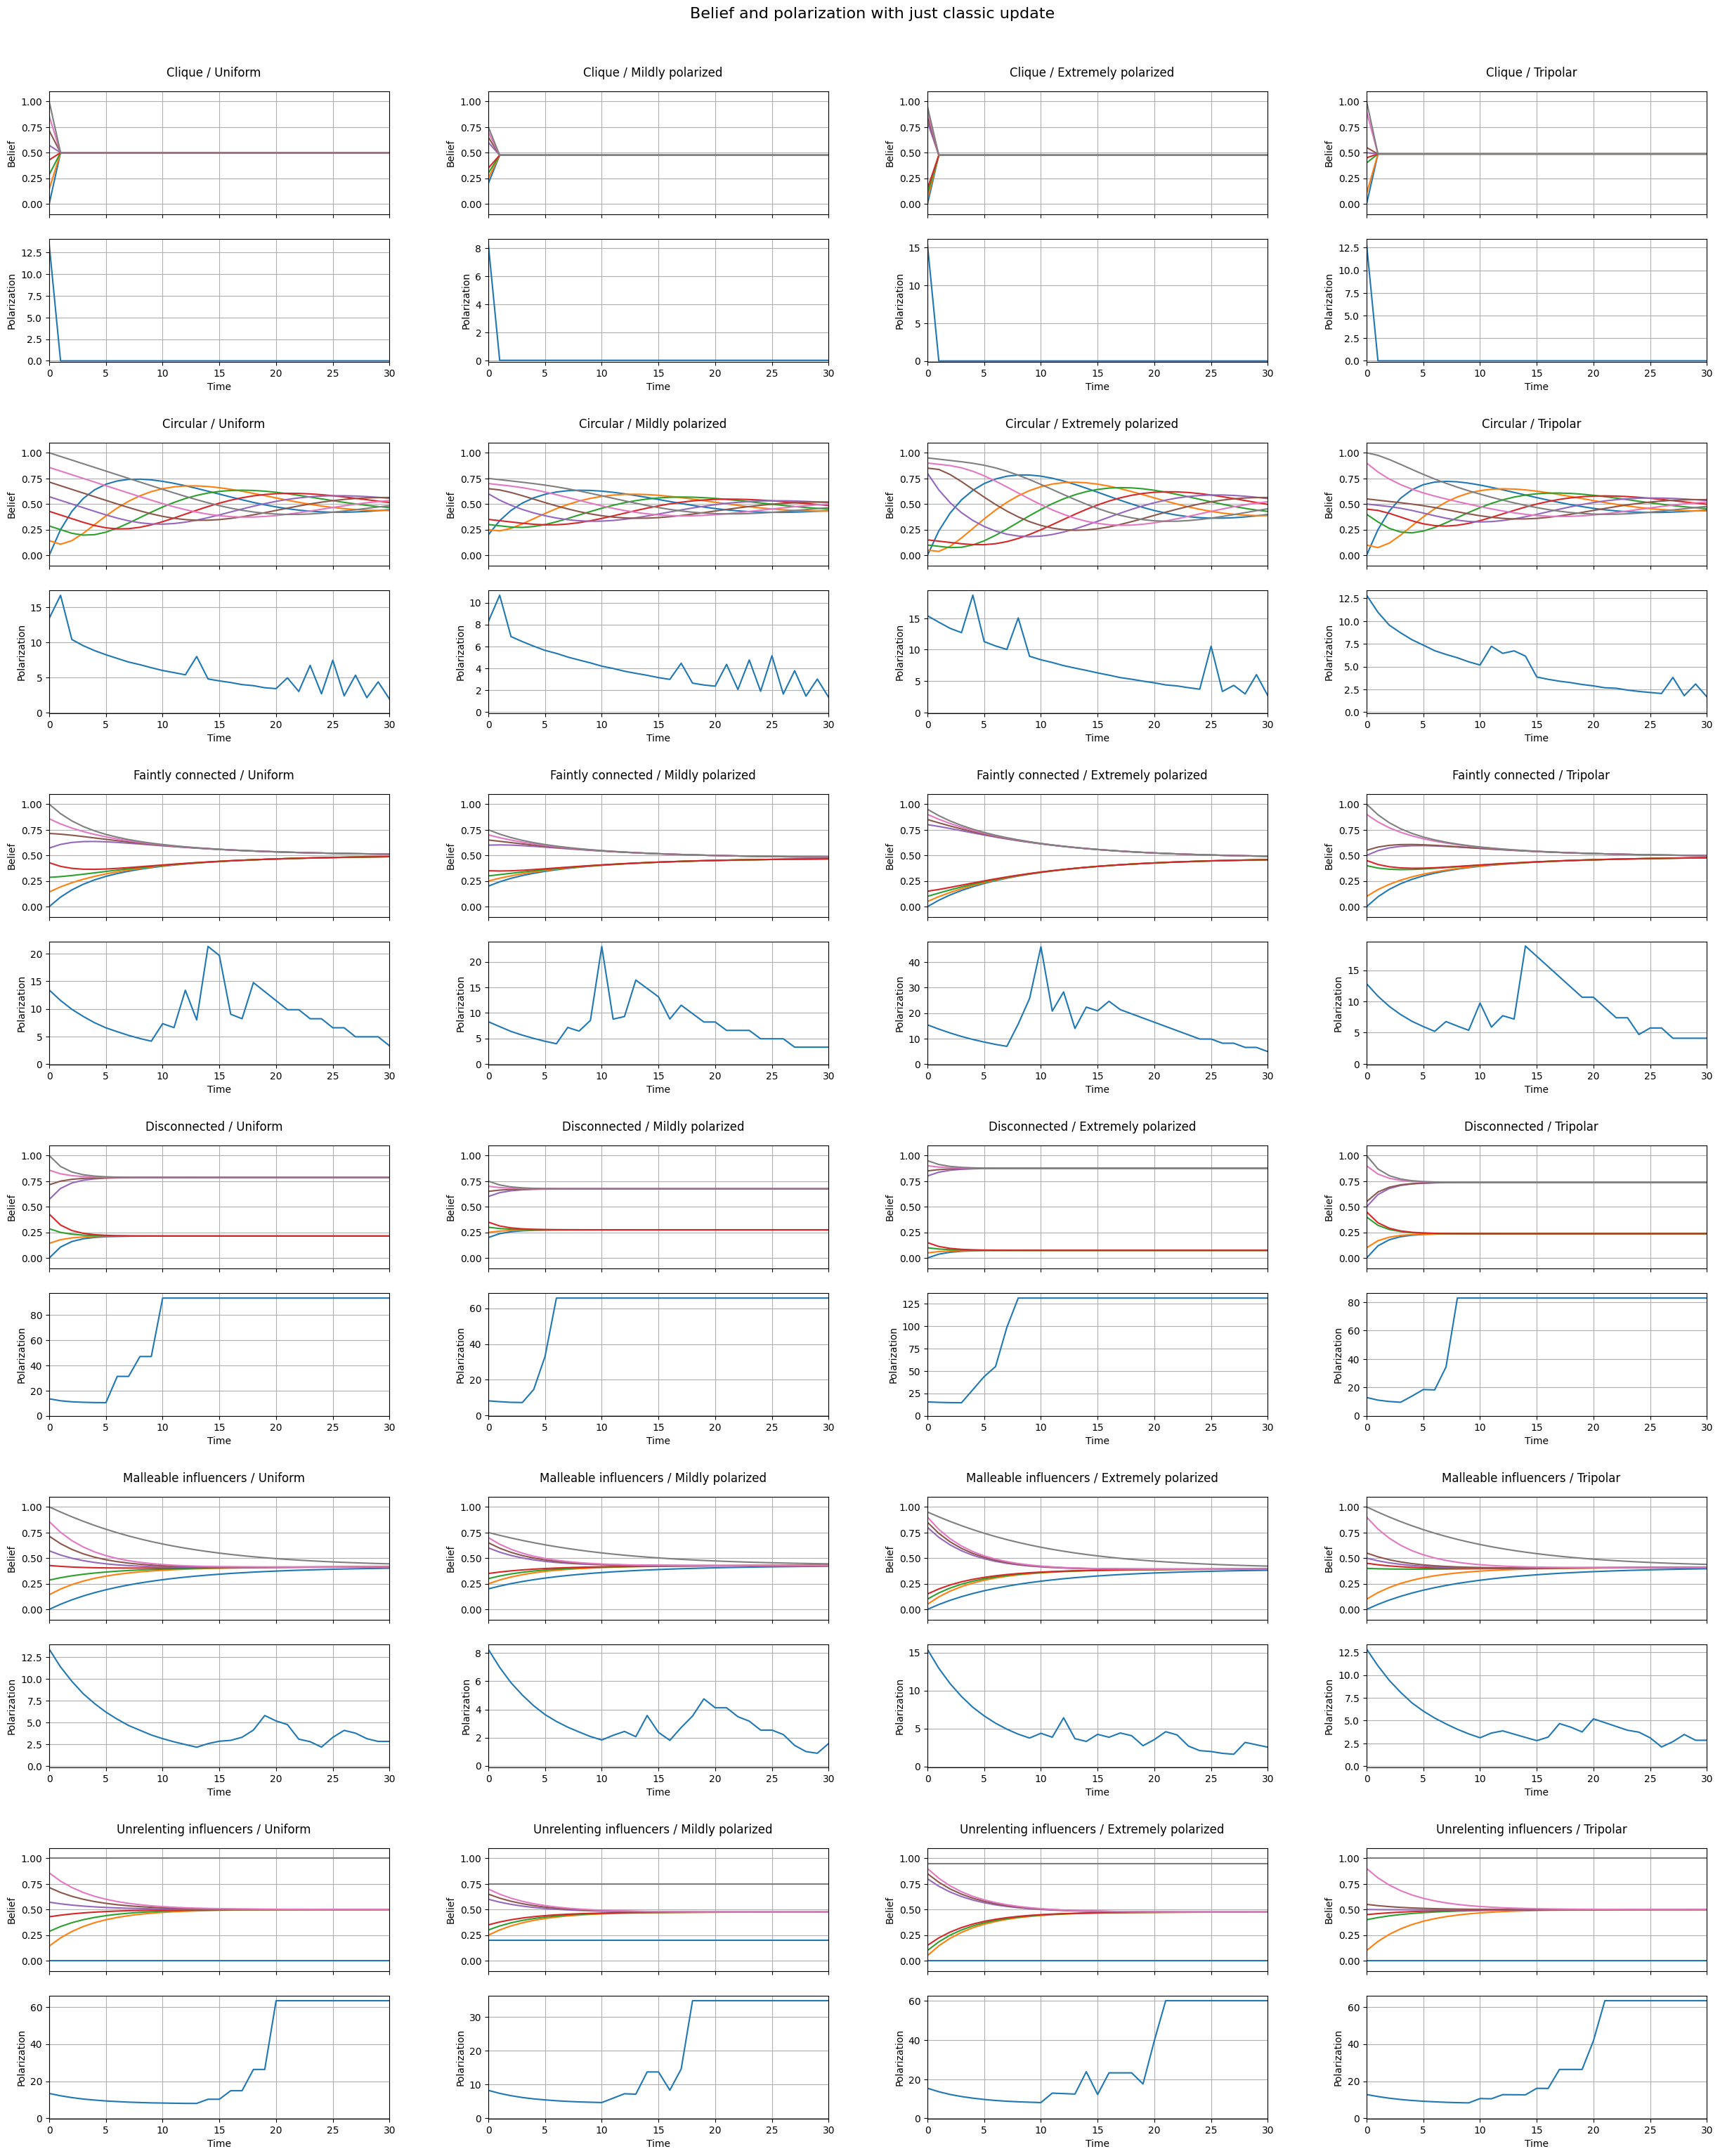

In [18]:
fig = plt.figure(figsize=(25, 30))
fig.suptitle("Belief and polarization with just classic update", fontsize=16, y=1.02)
subfigs = fig.subfigures(len(influence_graphs), len(initial_configurations))
for i in range(len(influence_graphs)):
    for j in range(len(initial_configurations)):
        subfig = subfigs[i][j]
        subfig.suptitle(
            f"{influence_graphs[i][1]} / {initial_configurations[j][1]}", y=0.95
        )
        axs = subfig.subplots(2, 1, sharex=True)
        belief_ax = axs[0]
        polarization_ax = axs[1]
        belief_ax.plot(get_belief_array_history(models[i][j].belief_state_history))
        belief_ax.set_xlim(0, NUM_STEPS)
        belief_ax.set_ylim(-0.1, 1.1)
        belief_ax.set_ymargin(1)
        belief_ax.set_ymargin(1)
        belief_ax.set_ylabel("Belief")
        belief_ax.grid(True)
        polarization_ax.plot(polarization[i][j])
        polarization_ax.set_xlim(0, NUM_STEPS)
        polarization_ax.set_ylim(-0.1)
        polarization_ax.set_ymargin(1)
        polarization_ax.set_ymargin(1)
        polarization_ax.set_xlabel("Time")
        polarization_ax.set_ylabel("Polarization")
        polarization_ax.grid(True)